In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


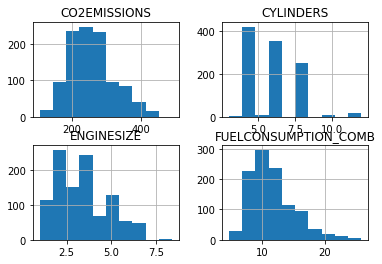

In [12]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

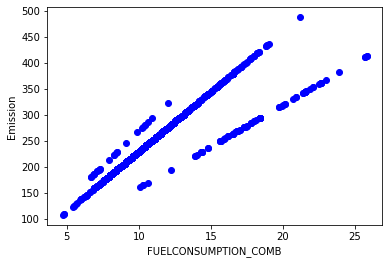

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

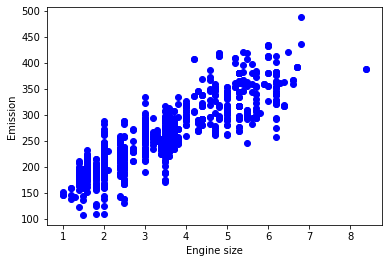

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to 
#select random rows using np.random.rand() function

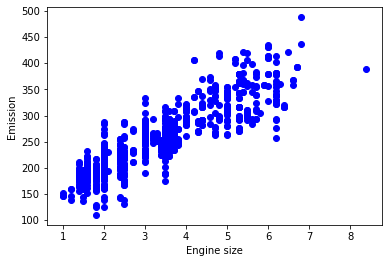

In [16]:
#train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

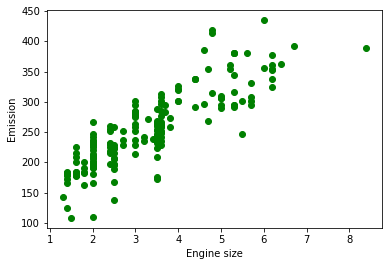

In [19]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.39458096]]
Intercept:  [124.31403112]


In [27]:
#Another way is the train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(df[['ENGINESIZE']],df[['CO2EMISSIONS']],test_size=0.2,random_state=1)
lm1=LinearRegression(fit_intercept=True)
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print ('Coefficients: ', lm1.coef_)
print ('Intercept: ',lm1.intercept_)

Coefficients:  [[39.4153746]]
Intercept:  [124.77059523]


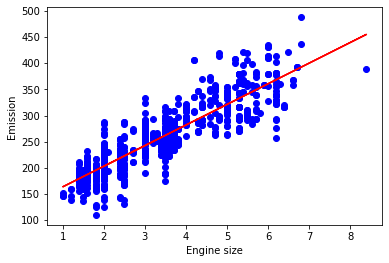

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission");

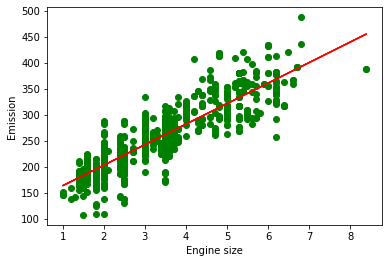

In [31]:
plt.scatter(X_train, y_train,  color='green')
plt.plot(X_train, lm1.coef_[0][0]*X_train + lm1.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission");

In [32]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 24.56
Residual sum of squares (MSE): 1068.32
R2-score: 0.65


In [34]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)
test_y_hat = lm1.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.21
Residual sum of squares (MSE): 955.37
R2-score: 0.71


In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.5096717   7.79847074  9.02374416]]


In [36]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 547.17
Variance score: 0.86


In [37]:
r2_score(y_hat , y)

0.8152314733733999

In [42]:
XTR,XTE,YTR,YTE=train_test_split(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']],df[['CO2EMISSIONS']],test_size=0.2,random_state=1)

In [43]:
lm2 = linear_model.LinearRegression()
#x = np.asanyarray(X_train)
#y = np.asanyarray(y_train)
lm2.fit (XTR, YTR)
# The coefficients
print ('Coefficients: ', lm2.coef_)

Coefficients:  [[11.56295409  6.91231122  9.72527271]]


In [46]:
y_hat= lm2.predict(XTE)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - YTE) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(XTE, YTE))

Residual sum of squares: 546.26
Variance score: 0.87


In [48]:
r2_score(y_hat , YTE) #shows the test and split method is slightly better throughout.

0.8538348878208785

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [50]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.15694327 -1.17391398]]
Intercept:  [110.48764438]


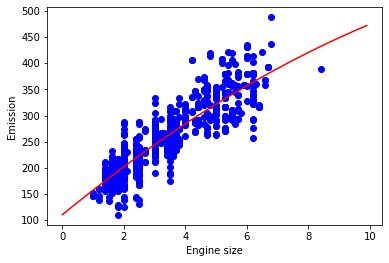

In [52]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission");

In [62]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x) #Have to transform from non-linear to linear for test also to apply to LR.
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.33
Residual sum of squares (MSE): 1042.48
R2-score: 0.65


Coefficients:  [[ 0.         26.02849652  5.03981378 -0.52612616]]
Intercept:  [133.60387569]
Mean absolute error: 24.23
Residual sum of squares (MSE): 1036.65
R2-score: 0.65


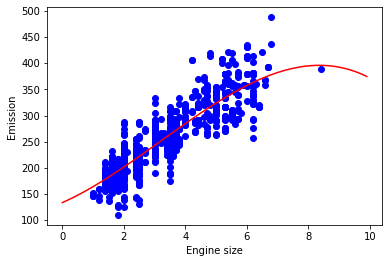

In [75]:
#Now trying for cubic (dgeree 3) to see if this one variable suits better than 2nd degree:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

In [59]:
#Now for polynomial regression with muliple indepedent vairables:
pol = PolynomialFeatures(degree=2)
trainpolx = pol.fit_transform(XTR) #XTR is multiple variables and so is different from above where only one is used.
trainpolx

array([[  1.  ,   3.  ,   6.  , ...,  36.  ,  74.4 , 153.76],
       [  1.  ,   6.4 ,   8.  , ...,  64.  , 110.4 , 190.44],
       [  1.  ,   2.5 ,   4.  , ...,  16.  ,  38.  ,  90.25],
       ...,
       [  1.  ,   4.8 ,   8.  , ...,  64.  , 101.6 , 161.29],
       [  1.  ,   2.4 ,   4.  , ...,  16.  ,  42.4 , 112.36],
       [  1.  ,   3.2 ,   6.  , ...,  36.  ,  67.2 , 125.44]])

In [60]:
clf1 = linear_model.LinearRegression()
clf1.fit(trainpolx, YTR)
# The coefficients
print ('Coefficients: ', clf1.coef_)
print ('Intercept: ',clf1.intercept_)

Coefficients:  [[  0.           1.73286444 -13.59191109  30.91270819   2.56212198
   -9.66927593   3.87262393   1.85056129   2.43875075  -1.85079924]]
Intercept:  [9.35016714]


In [105]:
testpolx = pol.fit_transform(XTE)  #Have to transform from non-linear poly to linear for test also to apply to LR.
testpoly = clf1.predict(testpolx)

In [73]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(YTE - testpoly)))
print("Residual sum of squares (MSE): %.2f" % np.mean((YTE - testpoly) ** 2))
print("R2-score: %.2f" % r2_score(YTE, testpoly) )

Mean absolute error: 11.27
Residual sum of squares (MSE): 433.44
R2-score: 0.89


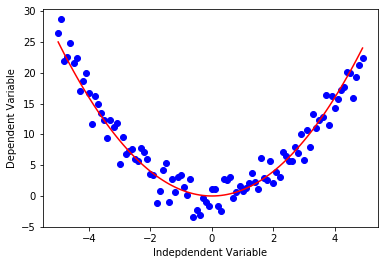

In [79]:
#Just an example of a quadratic graph:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [84]:
import numpy as np
import pandas as pd

#downloading dataset
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


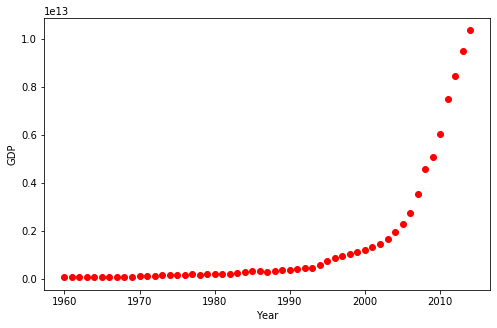

In [87]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values) #.values turns it into an array
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

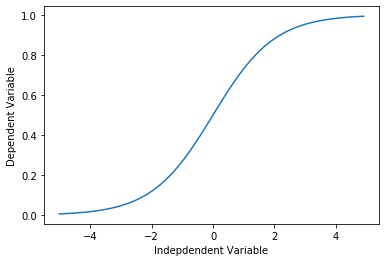

In [89]:
#From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the 
#property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end.
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [91]:
#Now, let's build our regression model and initialize its parameters:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

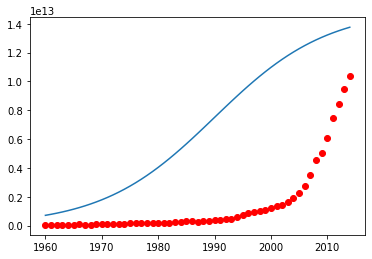

In [92]:
#Lets look at a sample sigmoid line that might fit with the data:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [93]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [96]:
#we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the 
#parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.
#popt are our optimized parameters.

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


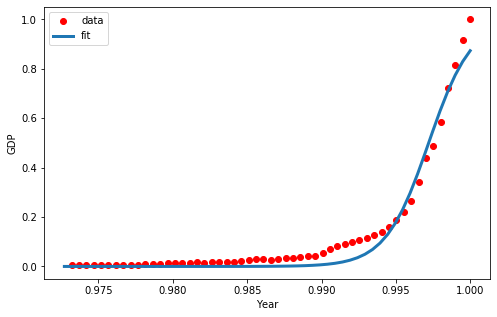

In [98]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [99]:
# split data into train/test
train_x ,test_x,train_y,test_y=train_test_split(xdata, ydata, test_size=0.2, random_state=1)

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.97


In [100]:
#Polynomial regression is non-linear in the way that x is not linearly correlated with f(x,β); the equation itself is still 
#linear. In the other hand, non-linear regression is both non-linear in equation and x not linearly correlated with f(x,β).

In [104]:
#Non-linear regression includes log, to the power x, sigmoid, etc. Since is is not not linear in any way like the polynomials,
#polynomial features and fit_transform cannot be used to transform it to a linear regression compatable. curve_fit used instead.
#curve_fit(): Use non-linear least squares to fit a function, f, to data. So for non linear functions.

In [106]:
#Question: Can there be multivariate non-linear regression?